<a href="https://colab.research.google.com/github/kapibara3chi/Make_Design_Structure_Matrix/blob/main/DSM_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit
# !pip install pyngrok

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# from pyngrok import ngrok

# public_url = ngrok.connect(port='80')
# print(public_url)
# print("****")

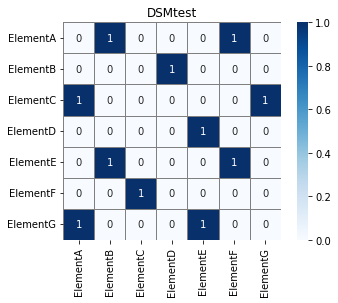

In [3]:
# %%writefile /content/drive/MyDrive/DSM/my_module.py
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def make_dsm_by_sns():

  # データの作成
  B = np.array([[0, 1, 0, 0, 0, 1, 0],
                [0, 0, 0, 1, 0, 0, 0],
                [1, 0, 0, 0, 0, 0, 1],
                [0, 0, 0, 0, 1, 0, 0],
                [0, 1, 0, 0, 0, 1, 0],
                [0, 0, 1, 0, 0, 0, 0],
                [1, 0, 0, 0, 1, 0, 0]])
  df = pd.DataFrame(data=B, columns=["ElementA", "ElementB", "ElementC", "ElementD", "ElementE", "ElementF", "ElementG"],
                    index=["ElementA", "ElementB", "ElementC", "ElementD", "ElementE", "ElementF", "ElementG"])
  
  # Seabornを使ったヒートマップの作成
  sns.heatmap(df, annot=True, cmap='Blues', fmt='d', linewidths=0.5, linecolor='grey', square=True)
  
  plt.title('DSMtest')
  plt.savefig("DSMtest.png",bbox_inches="tight")
  plt.show()

def make_dsm_by_plotly():
  import plotly.graph_objs as go
  import numpy as np
  
  # データの定義
  B = np.array([[0, 1, 0, 0, 0, 1, 0],
                [0, 0, 0, 1, 0, 0, 0],
                [1, 0, 0, 0, 0, 0, 1],
                [0, 0, 0, 0, 1, 0, 0],
                [0, 1, 0, 0, 0, 1, 0],
                [0, 0, 1, 0, 0, 0, 0],
                [1, 0, 0, 0, 1, 0, 0]])
  
  xvalues = ["ElementA", "ElementB", "ElementC", "ElementD", "ElementE", "ElementF", "ElementG"]
  yvalues = ["ElementA", "ElementB", "ElementC", "ElementD", "ElementE", "ElementF", "ElementG"]
  
  # Plotlyのheatmap traceを作成
  heatmap = go.Heatmap(z=B, x=xvalues, y=yvalues, colorscale='Blues', showscale=True, 
                      text=B, hoverinfo='skip', 
                      xgap=1, ygap=1, zmin=0, zmax=1)
  
  # Plotlyのfigureオブジェクトを作成
  fig = go.Figure(data=[heatmap])
  
  # レイアウトの調整
  fig.update_layout(width=600, height=600, xaxis_showgrid=True, yaxis_showgrid=True, 
                    yaxis_autorange='reversed', title='DSMtest')
  
  # ヒートマップの各セルに値を表示する
  for i in range(len(yvalues)):
      for j in range(len(xvalues)):
          fig.add_annotation(x=xvalues[j], y=yvalues[i], text=str(B[i][j]), showarrow=False)
  
  # プロットの表示
  fig.show()

if __name__ == '__main__':
   make_dsm_by_sns()

In [4]:
# !streamlit run --server.port 80 /content/drive/MyDrive/DSM/my_script.py >/dev/null &

In [14]:
%%writefile /content/drive/MyDrive/DSM/app.py
import sys
sys.path.append('/content/drive/MyDrive/DSM')
import streamlit as st
import my_module
txt=my_module.test()
st.title(txt)

# simple_streamlit_app.py

import numpy as np
import pandas as pd
import streamlit as st
df = pd.DataFrame( np.random.randn(10, 4), columns=['a2', 'b2', 'c','d'] )
st.title("Simple Streamlit App")
 
st.dataframe(df) 
st.write("📈　Line-Chart")
st.line_chart(df)
 
if st.checkbox('👓 Show DataFrame (with highlight_max)'):
 st.table(df.style.highlight_max(axis=0))


Overwriting /content/drive/MyDrive/DSM/app.py


In [ ]:
# from google.colab import files
# files.view("/content/drive/MyDrive")
# files.view("my_script.py")

In [15]:
# !streamlit run /content/drive/MyDrive/DSM/my_script.py & sleep 3 && npx localtunnel --port 8501
!streamlit run /content/drive/MyDrive/DSM/app.py & sleep 3 && npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.172.69.88:8501

npx: installed 22 in 2.286s
your url is: https://young-towns-lie-34-172-69-88.loca.lt
  Stopping...
^C
